## STUDENT NAME: VISHAL GNANASEKAR
## STDUENT ID:   30382300

# FIT5145 Assignment 1: Description
## Due date: Friday 6 September 2019- 11:55pm

## Assignment Tasks:
### There are three tasks (Tasks A, B and C) that you need to complete for this assignment. Students that complete only the questions that are not labelled as “Challenge” can only get a maximum of Distinction. Students that attempt three questions labelled as “Challenge” will be showing critical analysis skills and a deeper understanding of the task at hand and can achieve the highest grade. You need to use Python to complete the tasks.



## Task A: Investigating Natural Increase in Australia's population

### A1. Investigating the Births, Deaths and TFR Data 

### 1. Using Python, plot the number of births recorded in each state/territory for different Australian states over different years


## Import all Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import linregress
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_birth=pd.read_csv("Births.csv")

#### a. Describe the trend in number of births for Queensland and Tasmania for the period 1977 to 2016? 

In [3]:
df_birth.columns

Index(['Year', 'NSW', 'ACT', 'QLD', 'SA', 'WA', 'TAS', 'VIC', 'NT'], dtype='object')

Text(0.5, 1.0, 'Number of births in Australia from 1977 to 2016')

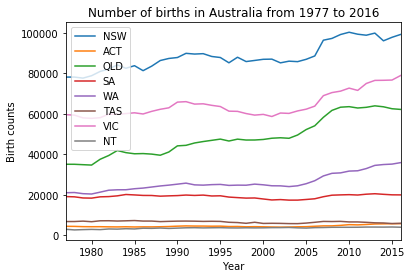

In [4]:
df_birth.plot(x="Year", y=['NSW', 'ACT', 'QLD', 'SA', 'WA', 'TAS', 'VIC', 'NT'])
plt.ylabel("Birth counts")
plt.xlabel("Year")
plt.title('Number of births in Australia from 1977 to 2016')

Text(0.5, 1.0, 'Birth Trend in Queensland and Tasmania between 1977 to 2016')

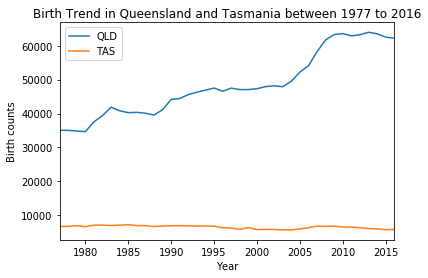

In [5]:
df_birth.plot(x="Year", y=["QLD", "TAS"])
plt.ylabel("Birth counts")
plt.xlabel("Year")
plt.title('Birth Trend in Queensland and Tasmania between 1977 to 2016')

   #### b. Draw a bar chart to show the number of births in each Australian state in 2016. 

Text(0.5, 1.0, 'Birth Count in Australian States')

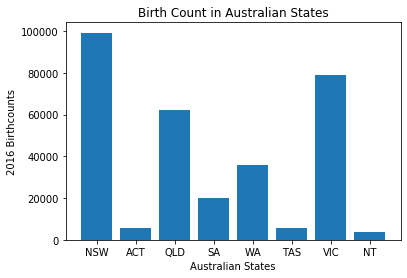

In [6]:
x= df_birth.columns.values[1:]
y= df_birth.iloc[39, 1:].values
z=plt.bar(x,y)
plt.ylabel("2016 Birthcounts")
plt.xlabel("Australian States")
plt.title("Birth Count in Australian States")


### 2. We will now investigate the trend in the total number of births over different years. For this, you will need to aggregate the total number of births registered in Australia by year. 

In [7]:
df_birth['sum']= df_birth.iloc[:,1:].sum(axis=1)

In [8]:
csv2=df_birth[['Year','sum']]

In [9]:
slope, intercept, r_value, pv_alue, std_err = linregress(csv2['Year'],csv2['sum'])

In [10]:

line = [slope*xi + intercept for xi in csv2['Year']]

#### a. Fit a linear regression using Python to the above aggregated data (i.e., total number of births registered in Australia over time) and plot the linear fit. 

Text(0.5, 1.0, 'Births registered in Australia over years')

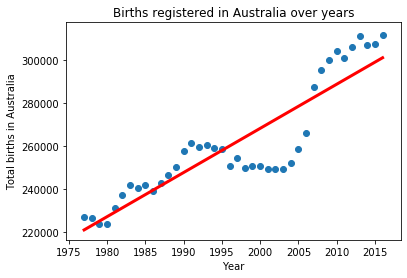

In [11]:
plt.plot(csv2['Year'],line,'r-', linewidth=3)
plt.scatter(csv2['Year'],csv2['sum'])
plt.xlabel("Year")
plt.ylabel("Total births in Australia")
plt.title("Births registered in Australia over years")

#### b. Does it look like a good fit to you? Identify the period time having any unusual trend(s) in your plot. 

In [12]:
z= csv2.iloc[39, 1:].values

#### c. Use the linear fit to predict the total births in Australia for the years 2050 and 2100. 

In [13]:
X = csv2['Year']
y=csv2['sum']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = regressor.predict((X_test))

In [19]:
y_pred

array([267871.33540612, 263589.3105588 , 274294.3726771 , 229333.11178027,
       242179.18632222, 252884.24844051, 280717.40994807, 244320.19874588])

In [20]:
X_test1= [[2050],[2100]]

In [21]:
y_pred1 = regressor.predict((X_test1))

In [22]:
y_pred1

array([377062.9690127 , 484113.59019563])

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10604.085412652232
Mean Squared Error: 195137107.50828704
Root Mean Squared Error: 13969.148417433578


#### d. Instead of fitting the linear regression to all of the data, try fitting it to just the most recent data points (say from 2010 onwards). How is the fit? Which model would give better predictions of future population of Australia do you think and why?

In [24]:
z = csv2.iloc[33:]
z

,Year,sum
33,2010,303995
34,2011,301133
35,2012,305987
36,2013,311091
37,2014,306963
38,2015,307649
39,2016,311695


Text(0.5, 1.0, 'Births registered in Australia from 2010')

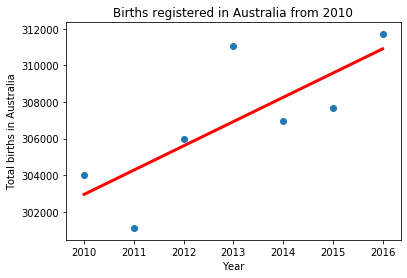

In [25]:
slope, intercept, r_value, pv_alue, std_err = linregress(z['Year'],z['sum'])
line = [slope*xi + intercept for xi in z['Year']]
plt.plot(z['Year'],line,'r-', linewidth=3)
plt.scatter(z['Year'],z['sum'])
plt.xlabel("Year")
plt.ylabel("Total births in Australia")
plt.title("Births registered in Australia from 2010")

#### e. Challenge: Can you think of a better model than linear regression to fit to all of the data to capture the trend in the number of births. 


## Using Ridge regression 

In [26]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 10601.009385999641
Mean Squared Error: 195091173.1781916
Root Mean Squared Error: 13967.504185723074


In [27]:
y_predict1=model.predict(X_test1)
y_predict1

array([377039.3255533, 484067.5756333])

## KNN

#### i. Describe the model you suggested and explain why it is better suited for this task. 

In [28]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_test)

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y1_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y1_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y1_knn)))

Mean Absolute Error: 3294.7000000000044
Mean Squared Error: 22463746.510000084
Root Mean Squared Error: 4739.593496282153


#### ii. Use your model to predict the total births for the years 2050 and 2100.

In [29]:
y_predict1=model.predict(X_test1)
y_predict1

array([377039.3255533, 484067.5756333])

### 3. Inspect the data on Total Fertility Rate (TFR.csv) for Queensland and Northern Territory. 

In [30]:
df_tfr=pd.read_csv("TFR.csv")

#### a. What was the minimum value for TFR recorded in the dataset for Queensland and when did that occur? What was the corresponding TFR value for Northern Territory in the same year? 

In [31]:
df_tfr["QLD"].min()

1.8

In [32]:
df_tfr[df_tfr['QLD']==1.8].index

Int64Index([28], dtype='int64')

In [33]:
df_tfr.iloc[28]

Year    1999.000
NSW        1.835
VIC        1.641
QLD        1.800
SA         1.707
WA         1.785
TAS        1.877
NT         2.123
ACT        1.643
Name: 28, dtype: float64

In [34]:
df_tfr.NT.iloc[28]

2.123

### 4. Next, plot the natural growth in Australia's population over different years. For this, you will need to aggregate the total births and deaths by year. 

In [35]:
df_death= pd.read_csv("Deaths.csv")

In [36]:
df_death['sum']= df_death.iloc[:,1:].sum(axis=1)


In [37]:
merged = df_birth.merge(df_death, on='Year')

In [38]:
merged['Total']=merged['sum_x'] - merged ['sum_y']

In [39]:
merged.head(2)

,Year,NSW_x,ACT_x,QLD_x,SA_x,WA_x,TAS_x,VIC_x,NT_x,sum_x,NSW_y,VIC_y,QLD_y,SA_y,WA_y,TAS_y,NT_y,ACT_y,sum_y,Total
0,1977,78173,4381,35069,19086,20981,6739,59602,2923,226954,42075,30067,16991,9715,7914,3227,715,786,111490,115464
1,1978,78190,4342,35054,18964,21094,6751,59364,2600,226359,40121,29343,16353,9768,7781,3299,612,782,108059,118300


Text(0.5, 1.0, ' Natural growth in Australias population over different years')

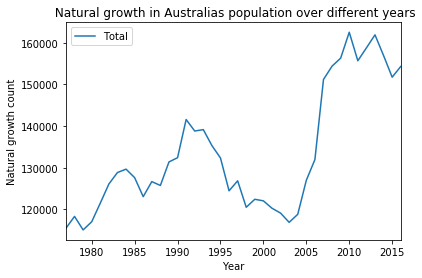

In [40]:
merged.plot(x="Year", y='Total')
plt.ylabel("Natural growth count")
plt.xlabel("Year")
plt.title(' Natural growth in Australias population over different years')

#### a. Describe the trend in natural growth in Australian population over time using linear regression? 

Text(0.5, 1.0, "Australia's Population over the Years")

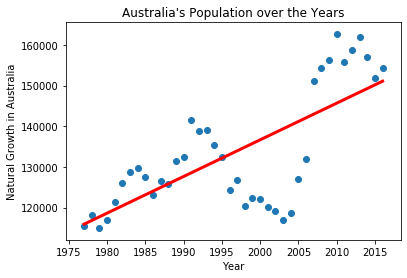

In [41]:
slope, intercept, r_value, pv_alue, std_err = linregress(merged['Year'],merged['Total'])
line = [slope*xi + intercept for xi in merged['Year']]
plt.plot(merged['Year'],line,'r-', linewidth=3)
plt.scatter(merged['Year'],merged['Total'])
plt.xlabel("Year")
plt.ylabel("Natural Growth in Australia")
plt.title("Australia's Population over the Years")

### A2. Investigating the Migration Data (NOM and NIM)

#### 1. Let’s look at the Net Overseas Migration (NOM) data in different states over time.

#### a. Use Python to plot the NOM to Victoria, Tasmania and Western Australia over time. Explain and compare the trend in all three states (VIC, TAS and WA).

In [42]:
nomcsv=pd.read_csv("NOM.csv")


In [43]:
nomcsv['NOMSUM']= nomcsv.iloc[:,1:].sum(axis=1)

Text(0.5, 1.0, 'Net overseas Migration trend for Australia')

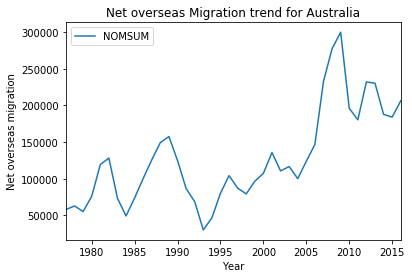

In [44]:
nomcsv.plot(x="Year", y= ["NOMSUM"])
plt.ylabel("Net overseas migration")
plt.xlabel("Year")
plt.title("Net overseas Migration trend for Australia")

#### b. Plot the Net Overseas Migration (NOM) to Australia over time. Do you find the trend strange? Explain the reason to your answer (Hint: You might go online to find contributing factors to this trend).

Text(0, 0.5, 'Net Overseas Migration')

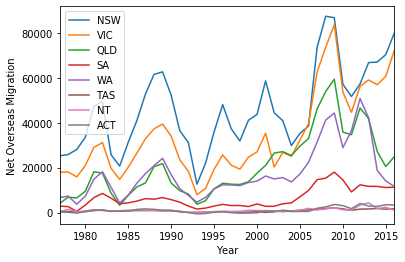

In [45]:
nomcsv.plot(x="Year" , y=['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'])
plt.xlabel("Year")
plt.ylabel("Net Overseas Migration")

#### 2. Now let's look at the relationship between Net Overseas Migration (NOM) and Net Interstate Migration (NIM).

In [46]:
nimcsv=pd.read_csv("NIM.csv")

In [47]:
nimcsv['NIMSUM']= nimcsv.iloc[:,1:].sum(axis=1)


In [48]:
nomnimmerged= nomcsv.merge(nimcsv, on="Year")

#### a. Use Python to combine the data from the different files into a single table. The resulting table should contain the NOM and NIM values for each of the states for a given year. What are the first year and last year for the combined data?

In [49]:
nomnimmerged1 = nomnimmerged.iloc[[0, -1]]

In [50]:
nomnimmerged1

,Year,NSW_x,VIC_x,QLD_x,SA_x,WA_x,TAS_x,NT_x,ACT_x,NOMSUM,NSW_y,VIC_y,QLD_y,SA_y,WA_y,TAS_y,NT_y,ACT_y,NIMSUM
0,1977,25236,17969,4012,2874,6631,506,408,261,57897,-9000,-10000,11000,0,5000,-1000,2000,2000,0
39,2016,80007,72215,24952,11283,11621,1771,1048,3330,206227,-11539,17639,11986,-7212,-10010,760,-2029,383,-22


#### b. Now that you have the data combined, we can see whether there is a relationship between NOM and NIM. Plot the values against each other using scatter plot. Can you see any relationship between NOM and NIM?

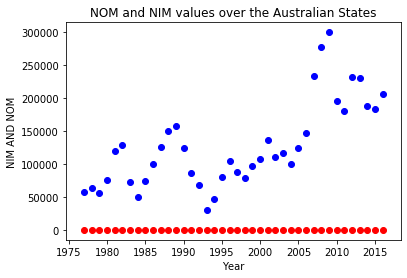

In [51]:
plt.scatter(nomnimmerged['Year'],nomnimmerged['NIMSUM'], c=['red'])
plt.scatter(nomnimmerged['Year'],nomnimmerged['NOMSUM'], c=['blue'])
plt.xlabel("Year")
plt.ylabel("NIM AND NOM")
plt.title("NOM and NIM values over the Australian States")
plt.show()

#### c. Try selecting and plotting the data for Victoria only using scatter plot. Can you see a relationship now? If so, explain the relationship

Text(0.5, 1.0, 'Victoria NOM and NIM')

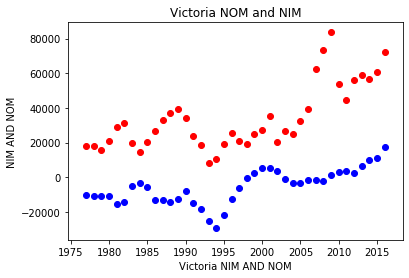

In [52]:
plt.scatter(nomnimmerged['Year'],nomnimmerged['VIC_x'], c=['red'])
plt.scatter(nomnimmerged['Year'],nomnimmerged['VIC_y'], c=['blue'])
plt.xlabel("Victoria NIM AND NOM")
plt.ylabel("NIM AND NOM")
plt.title("Victoria NOM and NIM")

#### d. Finally, plot the Net Interstate Migration (NIM) for Queensland and New South Wales over different years. Note graphs for both QLD and NSW should be on the same plot. Compare the plots for these two states. What can you infer from the trend you see for these two states?


Text(0.5, 1.0, 'NIM for QLD and NSW over the years')

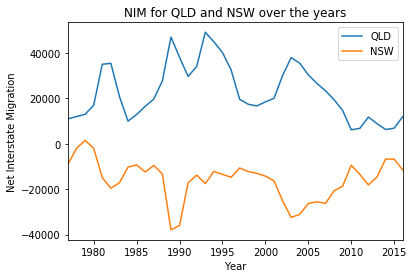

In [53]:
nimcsv.plot(x="Year", y=["QLD", "NSW"])
plt.ylabel("Net Interstate Migration")
plt.xlabel("Year")
plt.title("NIM for QLD and NSW over the years")

### A3. Visualising the Relationship over Time 

In [54]:
df_birth1= df_birth.copy()

In [55]:
df_births = df_birth1.melt(id_vars=['Year'], var_name = "States", value_name= "Birth_count")

In [56]:
df_deaths= df_death.melt(id_vars=['Year'], var_name = "States", value_name= "Death_count")

In [57]:
nomcsv_1= nomcsv.melt(id_vars=['Year'], var_name='States',value_name= "NOM_Count")

In [58]:
nimcsv_1=nimcsv.melt(id_vars=["Year"], var_name='States', value_name="NIM_Count")

In [59]:
df_tfr_1 = df_tfr.melt(id_vars=["Year"], var_name="States", value_name="TFR_Count")

In [60]:
df_births_deaths= df_births.merge(df_deaths, on=["Year","States"])

In [61]:
nomandnim= nomcsv_1.merge(nimcsv_1, on=["Year", "States"])

In [62]:
birdeanomnim= df_births_deaths.merge(nomandnim, on=["Year","States"])

In [63]:
mergeal= birdeanomnim.merge(df_tfr_1, on=["Year","States"], how="right")

In [64]:
mergeal['Total']= mergeal['Birth_count'] - mergeal['Death_count'] + mergeal['NOM_Count'] + mergeal['NIM_Count']

### 1. Use Python to build a Motion Chart, that compares the role migration (overseas and interstate) plays towards population growth in each Australia state/territory over time. The motion chart should show the Net Overseas Migration (NOM) on the x-axis, the Net Interstate Migration (NIM) on the y-axis, and the bubble size should show the Total Population Growth. 

In [65]:
from motionchart.motionchart import MotionChart

In [66]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px; 
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [67]:
mChart = MotionChart(df = mergeal, key='Year', x='NOM_Count', y='NIM_Count', xscale='linear', yscale='linear',
                     size='Total', color='States', category='States',title="Australia NIM and NOM Trend")

mChart.to_notebook()

In [68]:
mergeal_1=mergeal.loc[mergeal['States'].isin(['NSW','VIC'])]
mChart1 = MotionChart(df = mergeal_1, key='Year', x='NOM_Count', y='NIM_Count', xscale='linear', yscale='linear',
                     size='Total', color='States', category='States')

mChart1.to_notebook()

#### 2006

### 2. Run the visualisation from start to end. (Hint: In Python, to speed up the animation, set timer bar next to the play/pause button to the minimum value.) And then answer the following questions:


#### a. Comment generally on the trend you see in Net Overseas Migration (NOM) and Net Interstate Migration (NIM) overtime. Is there any relationship between the two variables?

#### b. Select VIC and NSW for this question: In which year(s) does VIC have a higher Net Overseas Migration (NOM) than NSW. Please support your answer with a relevant python code and motion chart screenshot.


## 2006

#### c. Which state has the highest Net Interstate Migration most of the years (for the period 1977 to 2016?

## QLD

## Task B: Exploratory Analysis of Data


### B1. Daily number of crimes

In [69]:
df=pd.read_csv("Crime_Statistics_SA_2014_2019.csv")

#### 1. For each suburb, calculate the number of days that at least 15 crimes have occurred per day

In [70]:
groupby1=df.groupby(['Suburb - Incident','Reported Date'])['Offence Count']

In [71]:
totalsum1= groupby1.sum()


In [72]:
totalsum=totalsum1.to_frame().reset_index()

In [73]:
totalsum.rename(columns={"Offence Count": "Total sum"}, inplace="True")

In [74]:
df2=totalsum[totalsum['Total sum'] >= 15.0]

In [75]:
df3=df2.groupby("Suburb - Incident")['Reported Date'].nunique()

In [76]:
df3=df3.to_frame().reset_index()
df3

,Suburb - Incident,Reported Date
0,ADELAIDE,877
1,ASCOT PARK,1
2,DAVOREN PARK,1
3,FINDON,1
4,GLENELG,1
5,LOXTON,1
6,MARLESTON,1
7,MODBURY,1
8,MORPHETT VALE,3
9,MOUNT BARKER,1


#### 2. Now which suburbs do have at least one day where the daily number of crimes are more than 15. Plot the number of days that at least 15 crimes have occurred for the suburbs you found in this step (step 2) using a bar graph.


In [77]:
df4=totalsum[totalsum['Total sum'] > 15.0]
df5=df4.groupby("Suburb - Incident")['Reported Date'].nunique()
df5=df5.to_frame().reset_index()
df5

,Suburb - Incident,Reported Date
0,ADELAIDE,752
1,ASCOT PARK,1
2,GLENELG,1
3,LOXTON,1
4,MARLESTON,1
5,MORPHETT VALE,2
6,MOUNT GAMBIER,3
7,MURRAY BRIDGE,1
8,NOT DISCLOSED,4
9,NURIOOTPA,1


In [78]:
filt= df3['Suburb - Incident'].isin(df5['Suburb - Incident'])
df3[filt]

,Suburb - Incident,Reported Date
0,ADELAIDE,877
1,ASCOT PARK,1
4,GLENELG,1
5,LOXTON,1
6,MARLESTON,1
8,MORPHETT VALE,3
10,MOUNT GAMBIER,3
11,MURRAY BRIDGE,5
12,NOT DISCLOSED,5
13,NURIOOTPA,1


Text(0.5, 1.0, 'Atleast 15 crimes in suburbs')

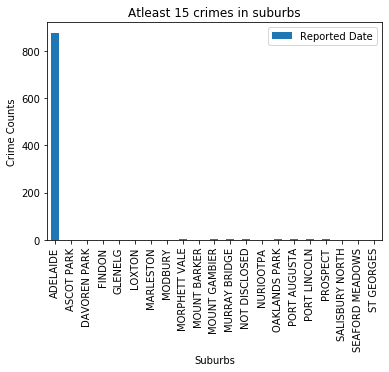

In [79]:
ax = df3.plot.bar(x='Suburb - Incident', y='Reported Date', rot=90)
plt.ylabel("Crime Counts")
plt.xlabel("Suburbs")
plt.title("Atleast 15 crimes in suburbs")

#### 3. Use an appropriate graph to visualize and detect outliers (extreme values) on the data from step 2 and remove them. Then, plot the data again using a bar graph.

Text(0.5, 1.0, 'Box plot for detecting outliers')

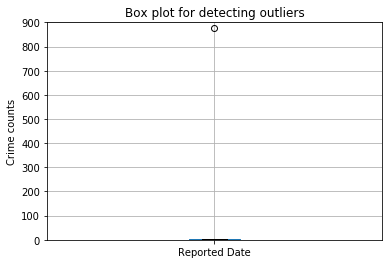

In [80]:
df3.boxplot(column = 'Reported Date')
plt.ylim(0, 900)
plt.ylabel("Crime counts")
plt.title("Box plot for detecting outliers")

In [81]:
df8=df3.drop(df3.index[0])

Text(0.5, 1.0, '15 crimes in suburbs')

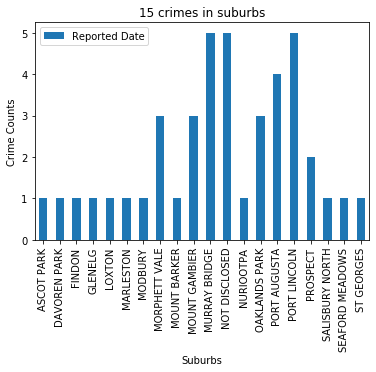

In [82]:
ax1 = df8.plot.bar(x='Suburb - Incident', y='Reported Date', rot=90)
plt.ylabel("Crime Counts")
plt.xlabel("Suburbs")
plt.title("15 crimes in suburbs")

#### 4. Compare the bar graphs in step 2 and 3. Which bar graph is easier to interpret? Why?

### Graph 2 is better

### B2. Challenge: Identify mistakes in data entry

#### There are some errors in the data entry in one of the columns.

#### 1. identify the data entry errors and provide possible solutions.

#### 2. Use Python to fix the errors.

In [83]:
 df.isnull().sum()

Reported Date                    0
Suburb - Incident              159
Postcode - Incident            403
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence Count                    0
dtype: int64

In [84]:
value = df['Suburb - Incident'].values

In [85]:
len(df)

385296

#### 3. Argue how your answers to part B1 might be changed after fixing the errors.

In [86]:
indices_to_remove = df.isin([np.nan, np.inf, -np.inf]).any(1)
df[indices_to_remove]
df.dropna(inplace=True)


In [87]:
df.reset_index(inplace=True)

In [88]:
len(df)

384888

In [89]:
df.tail(2)

,index,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence Count
384886,385294,2019-03-31,WYNN VALE,5127.0,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,SCT - Residence,1.0
384887,385295,2019-03-31,WYNN VALE,5127.0,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1.0


Text(0.5, 1.0, '15 crimes in suburbs')

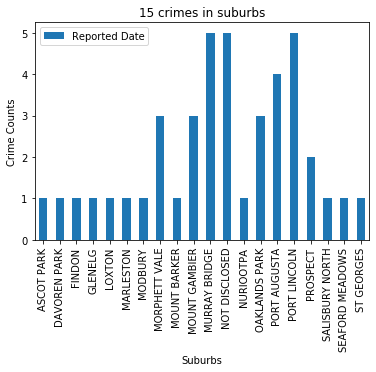

In [90]:
ax1 = df8.plot.bar(x='Suburb - Incident', y='Reported Date', rot=90)
plt.ylabel("Crime Counts")
plt.xlabel("Suburbs")
plt.title("15 crimes in suburbs")

## Task C: Exploratory Analysis on Other Data

### Challenge: Find some publicly available data and repeat some of the analysis performed in Tasks A and B above. As discussed in the lectures, there are many publicly available datasets online. 

In [91]:
weather=pd.read_csv("Summary of Weather.csv")

C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### 1. Your dataset(s) should contain at least 100 records.



In [92]:
len(weather)

119040

#### 2. Your dataset(s) should contain time component (e.g., year, day, etc.) in one of the columns.

#### 3. Your analysis should at least contain visualisation, interpretation of your visualisation and a prediction task.

In [93]:
weather = weather.drop(columns=['SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'])

In [94]:
weather.corr()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA
STA,1.000000,-0.549603,0.092371,0.059319,0.078112,0.121408,-0.008592,0.000903,-0.832958,-0.549603,0.083943,0.050807,0.069775
WindGustSpd,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,-0.124238,0.311690,0.197264
MaxTemp,0.092371,-0.124238,1.000000,0.878384,0.969048,0.039585,0.031346,-0.005130,0.011875,-0.124238,1.000000,0.870594,0.968247
MinTemp,0.059319,0.311690,0.878384,1.000000,0.965425,-0.020733,0.069078,-0.002576,0.525019,0.311690,0.872096,1.000000,0.966441
MeanTemp,0.078112,0.197264,0.969048,0.965425,1.000000,0.010681,0.050769,-0.004153,0.407395,0.197264,0.965838,0.963279,1.000000
YR,0.121408,NaN,0.039585,-0.020733,0.010681,1.000000,-0.144360,-0.011196,NaN,NaN,0.013986,-0.043323,-0.014723
MO,-0.008592,0.149525,0.031346,0.069078,0.050769,-0.144360,1.000000,0.006563,0.655035,0.149525,0.034329,0.072453,0.054847
DA,0.000903,0.002081,-0.005130,-0.002576,-0.004153,-0.011196,0.006563,1.000000,0.012000,0.002081,-0.003299,-0.000739,-0.002094
DR,-0.832958,0.351027,0.011875,0.525019,0.407395,NaN,0.655035,0.012000,1.000000,0.351027,0.011875,0.525019,0.407395
SPD,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,-0.124238,0.311690,0.197264


Text(0.5, 1.0, 'Histogram')

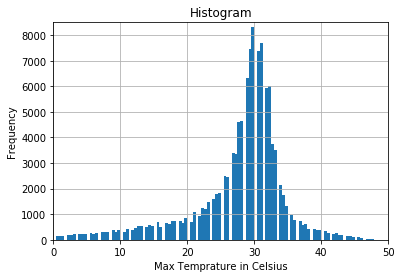

In [95]:
weather.MaxTemp.hist(bins = 200)  
plt.xlim(0,50)               
plt.ylim(0,8500)   
plt.xlabel("Max Temprature in Celsius")
plt.ylabel("Frequency")
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

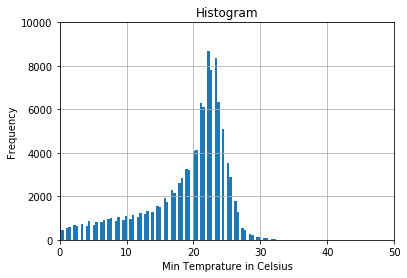

In [96]:
weather.MinTemp.hist(bins = 200)  
plt.xlim(0,50)               
plt.ylim(0,10000)   
plt.xlabel("Min Temprature in Celsius")
plt.ylabel("Frequency")
plt.title("Histogram")

In [97]:
weather_station = pd.read_csv("Weather Station Locations.csv")

In [98]:
weather_station[weather_station.NAME == "KEFLAVIK"]

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
64,16201,KEFLAVIK,IL,6358N,02236W,50,63.966667,-22.616667


In [99]:
weather_station_id = weather_station[weather_station.NAME == "KEFLAVIK"].WBAN 
weather_station_id

64    16201
Name: WBAN, dtype: int64

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


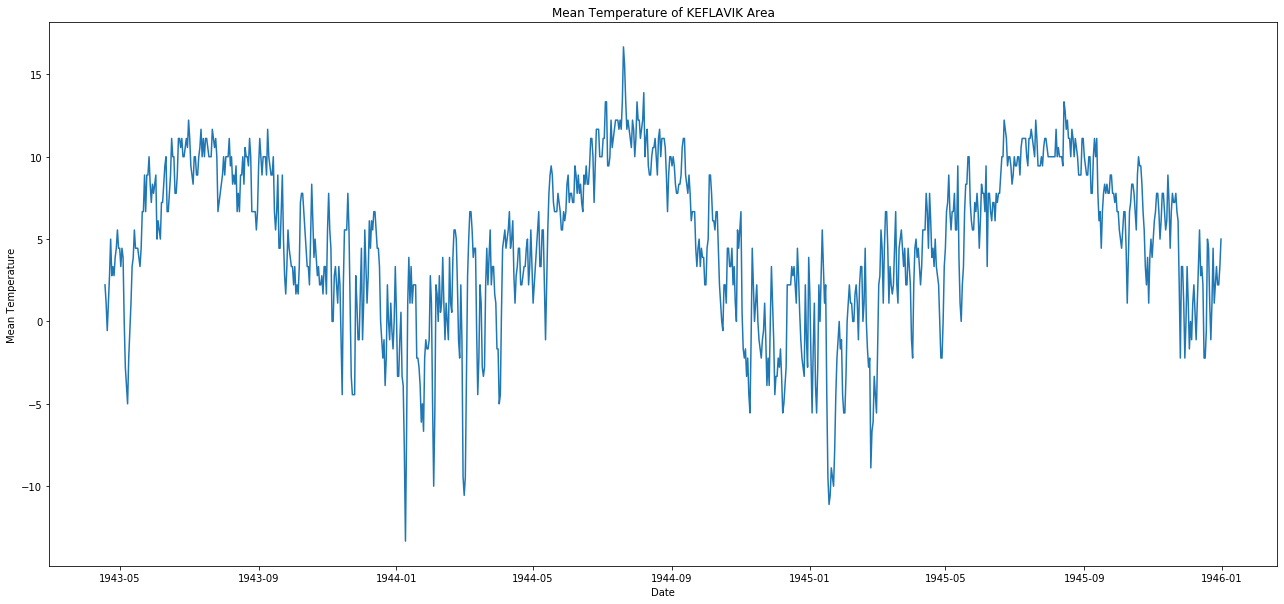

In [100]:
weather_bin = weather[weather.STA == 16201]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(22,10))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of KEFLAVIK Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

Text(0.5, 1.0, 'Linear regression for MaxTemp')

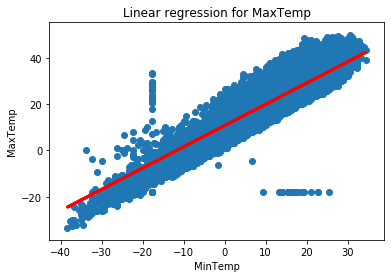

In [101]:
slope, intercept, r_value, pv_alue, std_err = linregress(weather['MinTemp'],weather['MaxTemp'])
line = [slope*xi + intercept for xi in weather['MinTemp']]
plt.plot(weather['MinTemp'],line,'r-', linewidth=3)
plt.scatter(weather['MinTemp'],weather['MaxTemp'])
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.title("Linear regression for MaxTemp")

In [102]:
X_train, X_test, y_train, y_test = train_test_split(weather['MinTemp'], weather['MaxTemp'], test_size=0.2, random_state=0)

In [103]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [104]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
X_test

array([[25.        ],
       [21.11111111],
       [17.22222222],
       ...,
       [23.88888889],
       [21.66666667],
       [22.77777778]])

In [106]:
y_pred = regressor.predict(X_test)
y_pred

array([33.67035117, 30.0912513 , 26.51215143, ..., 32.64775121,
       30.60255128, 31.62515124])

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7670218843587764

#### 4. Please include a link to your dataset in your report. You may wish to
#### a. provide the direct link to the public dataset from the internet, or
#### b. place the data file in your Monash student - google drive and provide its link in the submission

## https://drive.google.com/open?id=1TJY-Oa9AZQ7mZ5qWLbFTj-7qe5NIpTY8